import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

np.random.seed(1234)

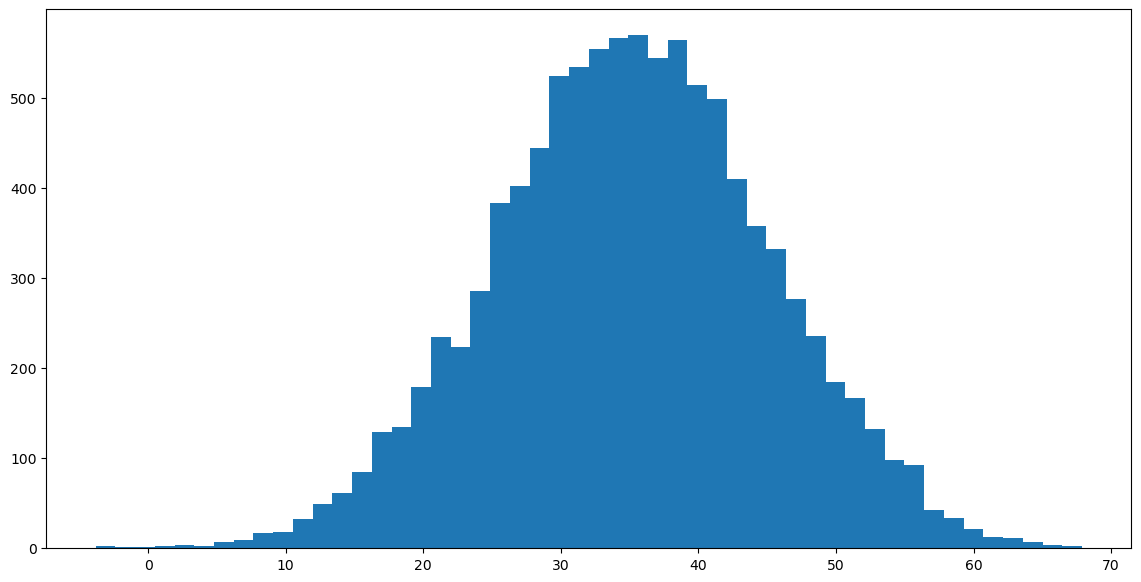

In [5]:
norm_rvl = stats.norm(loc=35, scale=10)
#loc - среднее значение стандартное отклонение (среднеквадратичное)
#scale - стандартное отклонение (среднеквадратичное)
#rvs - генерирует с помощью распределния заданное кол-во чисел
gen_pop = norm_rvl.rvs(size=10000)

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 50)
plt.show()

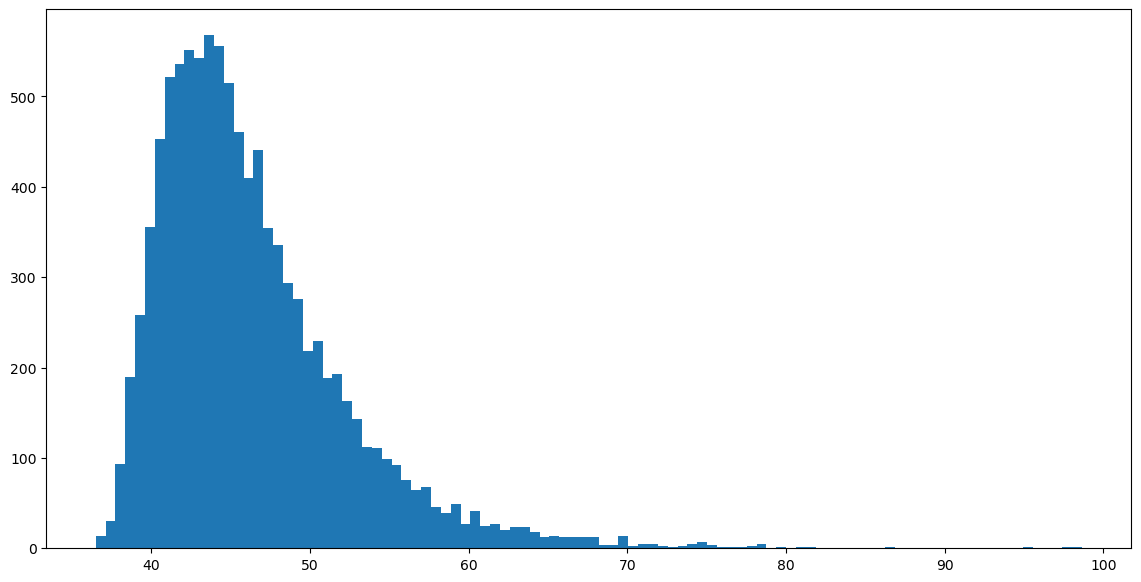

In [6]:
#логонормальное распределение
ln_distrib = stats.lognorm(0.5, loc=35, scale=10)
gen_pop_ln = ln_distrib.rvs(size=10000)

fig = plt.figure(figsize=(14,7))
ax2 = plt.subplot(111)
plt.hist(gen_pop_ln, 100)
plt.show()

In [7]:
#Теперь из описательной статистики возьмем одну из меру концентрации
median = np.median(gen_pop)
median_ln = np.median(gen_pop_ln)

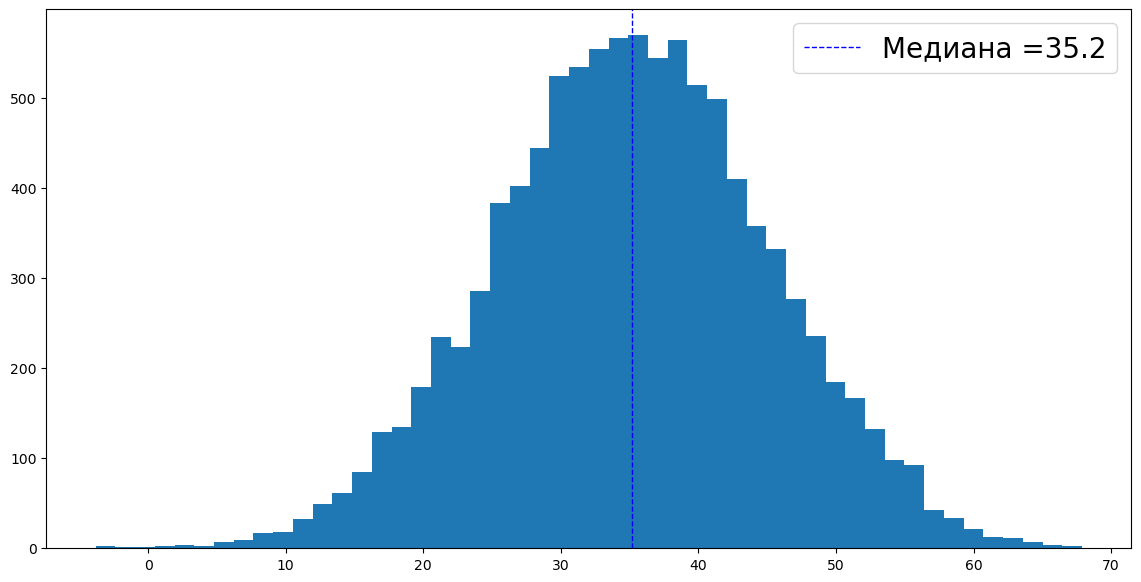

In [8]:
fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 50)

line1 = plt.axvline(median, label=('Медиана =' + str(round(median,1))), color='b', linestyle='dashed', linewidth=1)
ax1.legend(handles=[line1], fontsize=20)
plt.show()

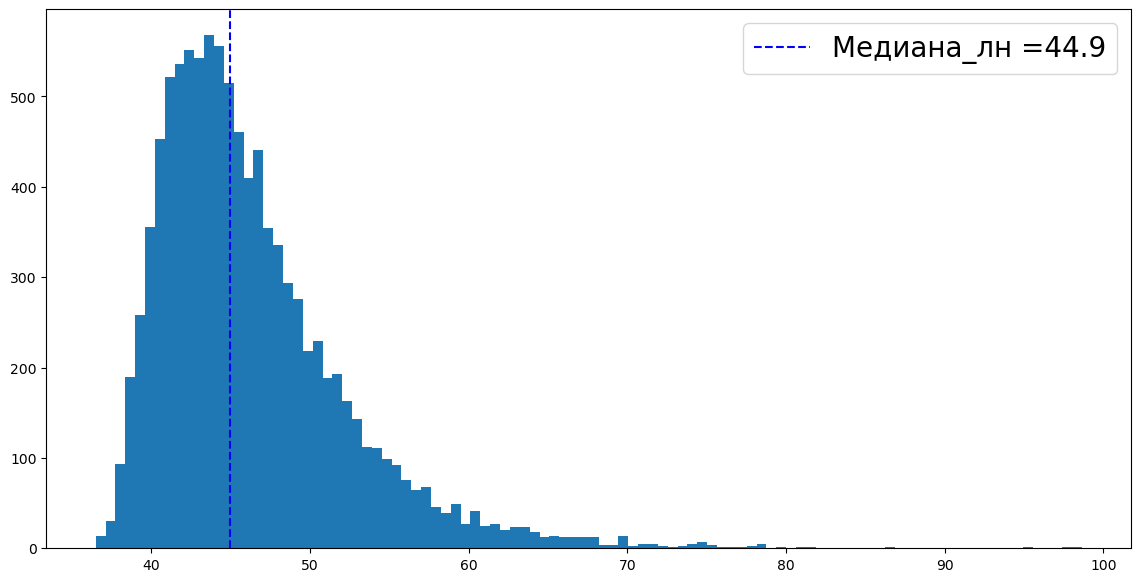

In [9]:
fig = plt.figure(figsize=(14,7))
ax2 = plt.subplot(111)
plt.hist(gen_pop_ln, 100)
line2 = plt.axvline(median_ln, label=('Медиана_лн =' + str(round(median_ln, 1) ) ), linestyle='dashed', color='b')
plt.legend(handles=[line2], fontsize=20)
plt.show()

In [10]:
gen_pop.mean()

35.16126460047198

In [11]:
#определим размер рандомной выборки n
n = 20
sample = np.random.choice(gen_pop, n, replace = False)
sample

array([45.84540182, 30.36607009, 44.60540966, 22.69489451, 38.12142983,
       37.27588626, 32.88274489, 40.79359645, 28.91730981, 21.65352149,
       46.6429562 , 42.177273  , 51.43199283, 33.92807832, 55.30761653,
       32.79527531, 41.64705047, 47.29453179, 33.55250849, 15.78042654])

In [12]:
sample_mean = np.mean(sample)
sample_mean

37.18569871483799

In [13]:
#я удивлен, ведь в numpy есть удобные методы np.var и np.std, то есть, дисперсия и среднеквадратичное отклонение, cоответственно
var_ = np.var(gen_pop)
std_ = np.std(gen_pop)
print(f'{var_} , {std_}')

99.03830444979266 , 9.951799055939215


In [14]:
std_sample = np.std(sample, ddof = 1)
std_sample

10.253744667363769

In [15]:
#теперь будем сравнивать среднеквадратические отклонения
iterations = 1000
n = 20 #размер выборки

std_sample_1 = []
std_sample_1_corrected = []

for i in range(iterations):
    sample = np.random.choice(gen_pop, n, replace=False)
    std_sample = np.std(sample)
    std_sample_corrected = np.std(sample, ddof = 1)

    std_sample_1.append(std_sample)
    std_sample_1_corrected.append(std_sample_corrected)

print(std_sample_1)
print('------------------------------------------------------------------')
print(std_sample_1_corrected)

[7.385538131522281, 8.859500586397253, 10.816916400285058, 8.098187090067979, 8.756487256624647, 10.654224891612957, 9.32196115952523, 8.750870199947355, 11.936445818840854, 10.241411624324133, 10.143252961049479, 10.061510426856692, 6.800019109737814, 7.277693616353752, 7.569548499789167, 9.373704625964228, 7.335406028159082, 10.162170300408889, 12.825521462723977, 11.265683391542098, 9.589587158682018, 9.570432692820154, 9.708736656620378, 9.784412756705981, 10.755524415243164, 9.020733486827837, 10.90976541745532, 9.701239529567358, 8.869630865477925, 12.384622206216227, 8.809860620748156, 8.415311401248688, 8.99936889467823, 11.27962978387953, 7.7425646773555155, 9.610690972817856, 10.523986213965092, 9.306866919339276, 10.287443853226367, 9.541442395998061, 8.683671140839792, 8.571837316174477, 9.770502190528802, 9.525097713595674, 6.172251064144532, 8.503487664994076, 8.51026551986156, 8.37521176432166, 9.616148492321074, 9.712404108131116, 8.050235697136326, 7.8511866881327155, 

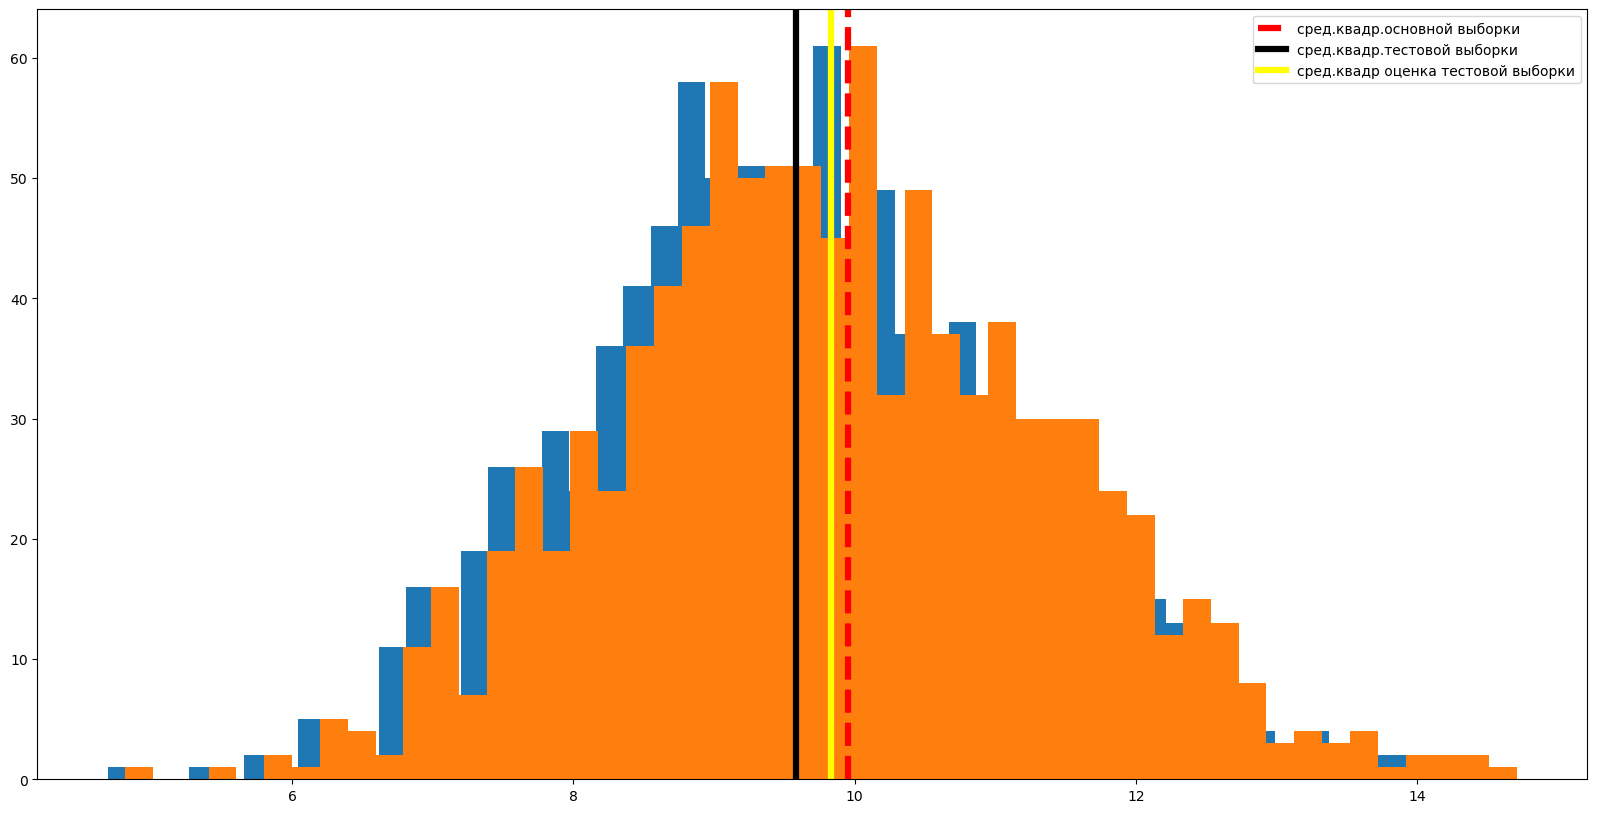

In [16]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)

plt.hist(std_sample_1, bins=50)
plt.hist(std_sample_1_corrected, bins = 50)

line1 = plt.axvline(std_, color='red', linestyle='--', linewidth=4.5, label='сред.квадр.основной выборки')
line2 = plt.axvline(np.mean(std_sample_1), color='black', linewidth=4.5, label='сред.квадр.тестовой выборки')
line3 = plt.axvline(np.mean(std_sample_1_corrected), color='yellow', linewidth=4.5, label='сред.квадр оценка тестовой выборки')

plt.legend()
plt.show()

In [17]:
#---------------------------------------------------------------------------------------------------------------
#Теперь разберем стандартную ошибку = среднеквадратическое отклонение / sqrt(N)
#оценка стандартной ошибки = оценка среднекв. отклонения / sqrt(n)
n = 20
sample = np.random.choice(gen_pop, n, replace=False)
#стандартная ошибка по выборке
stats.sem(sample)

1.9578921537038827

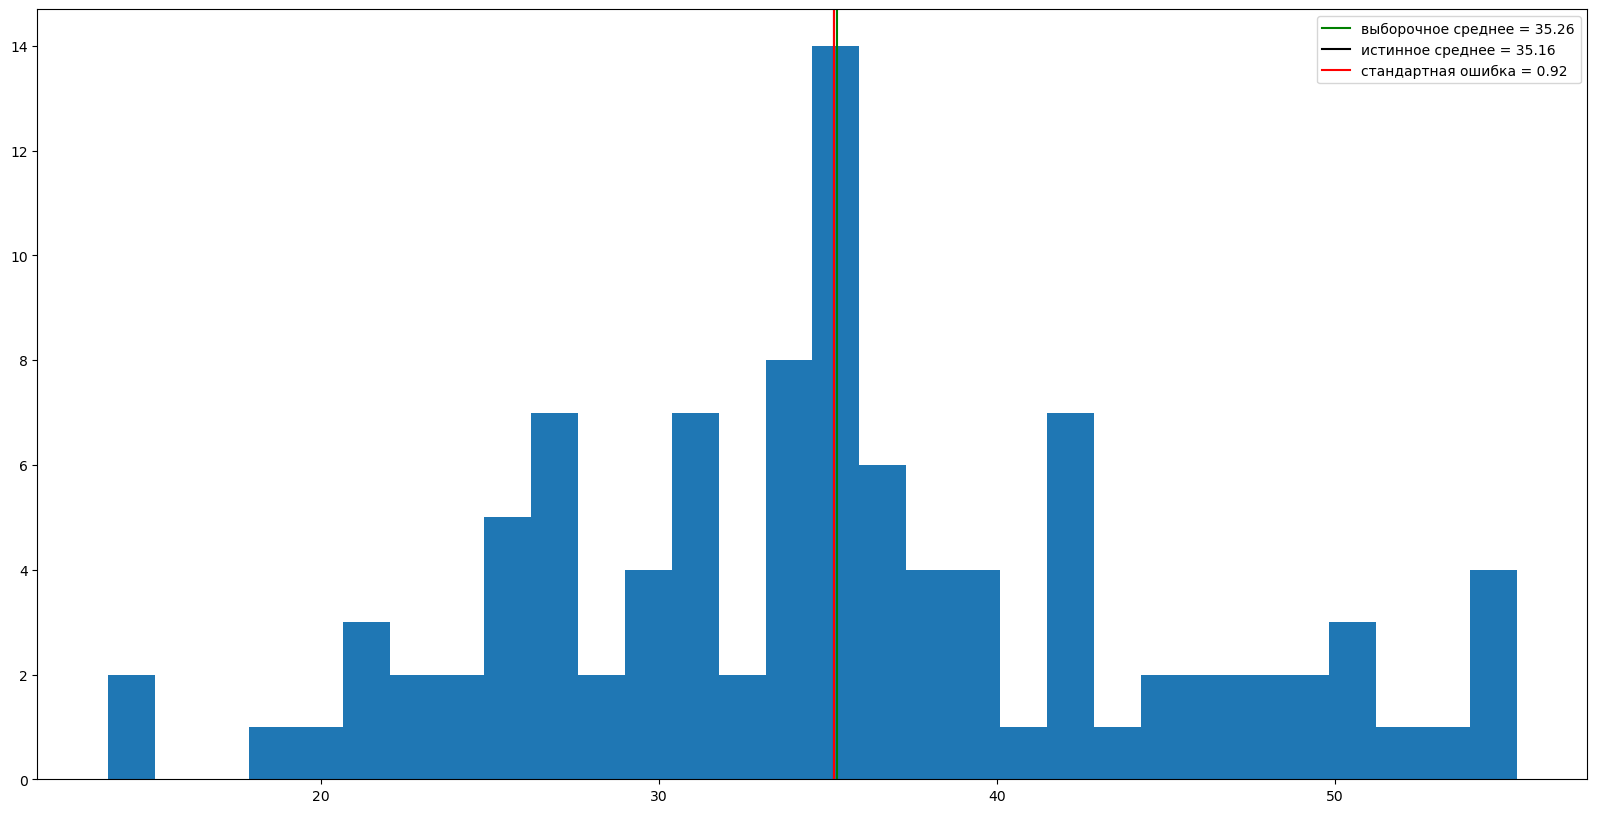

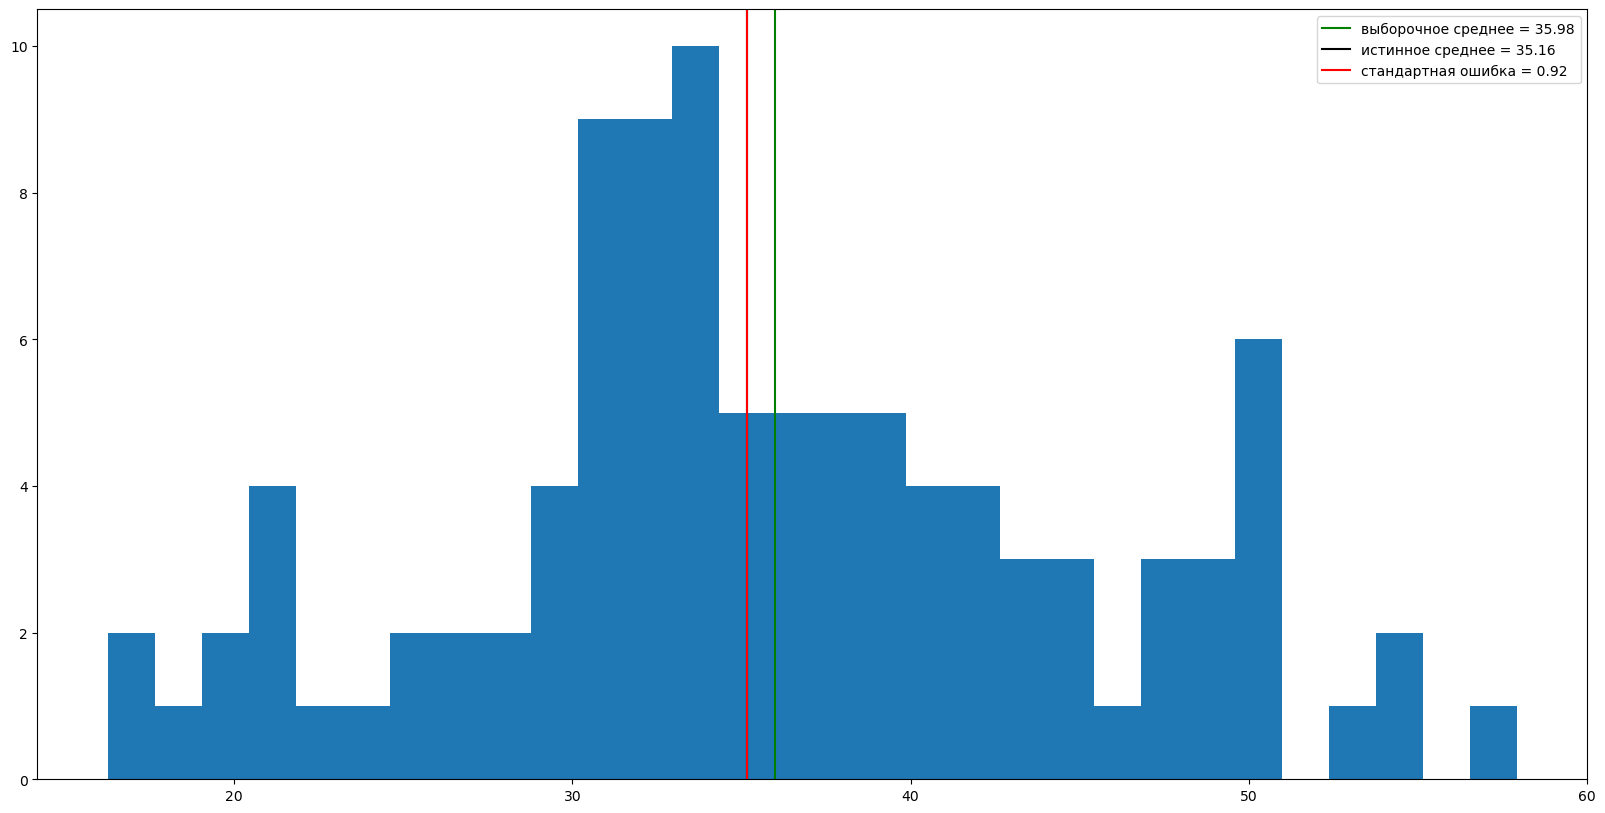

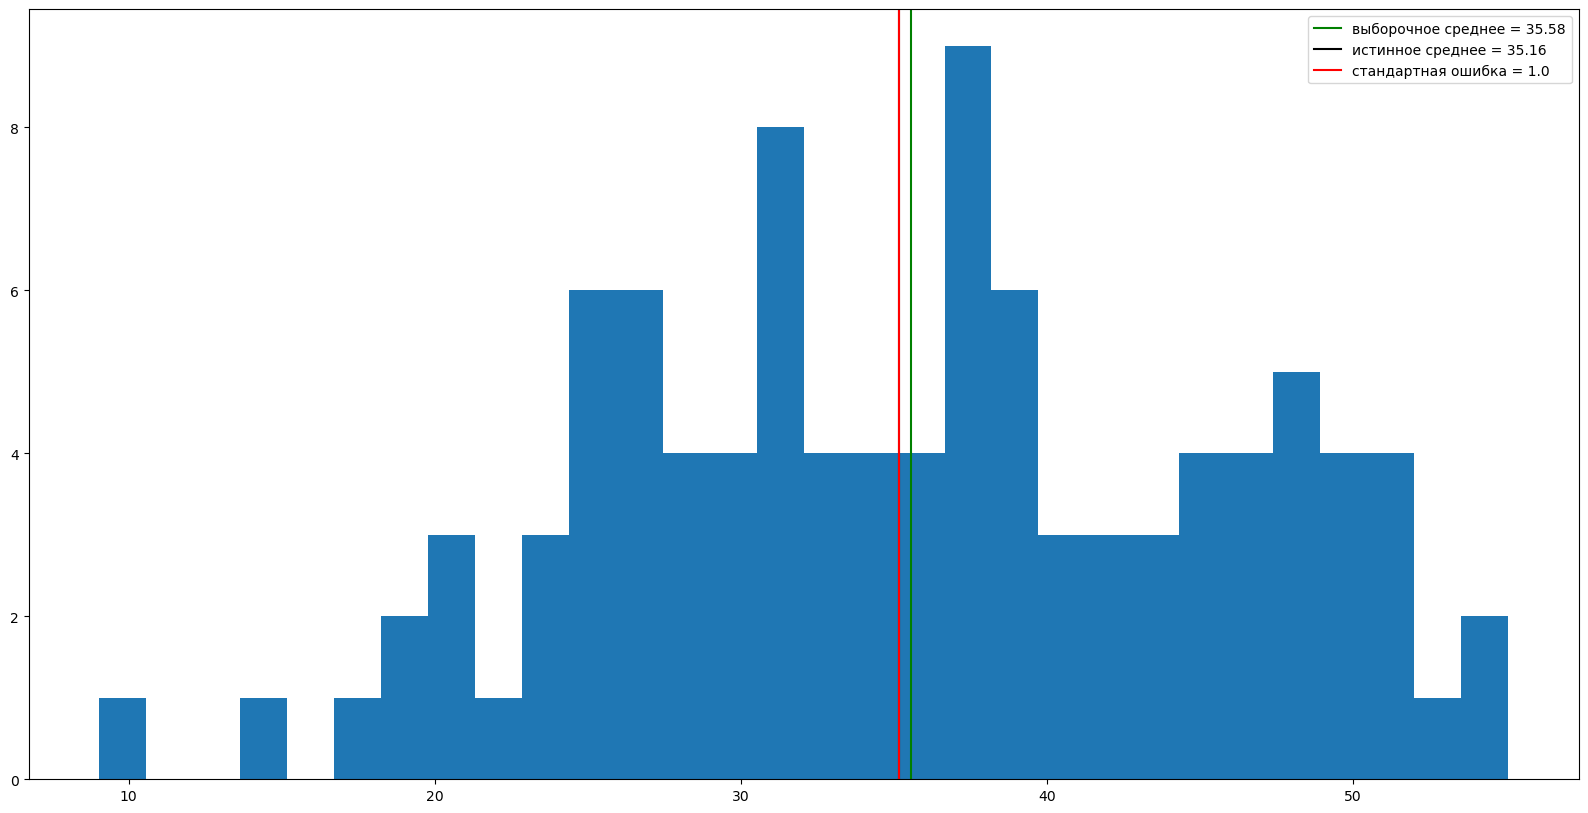

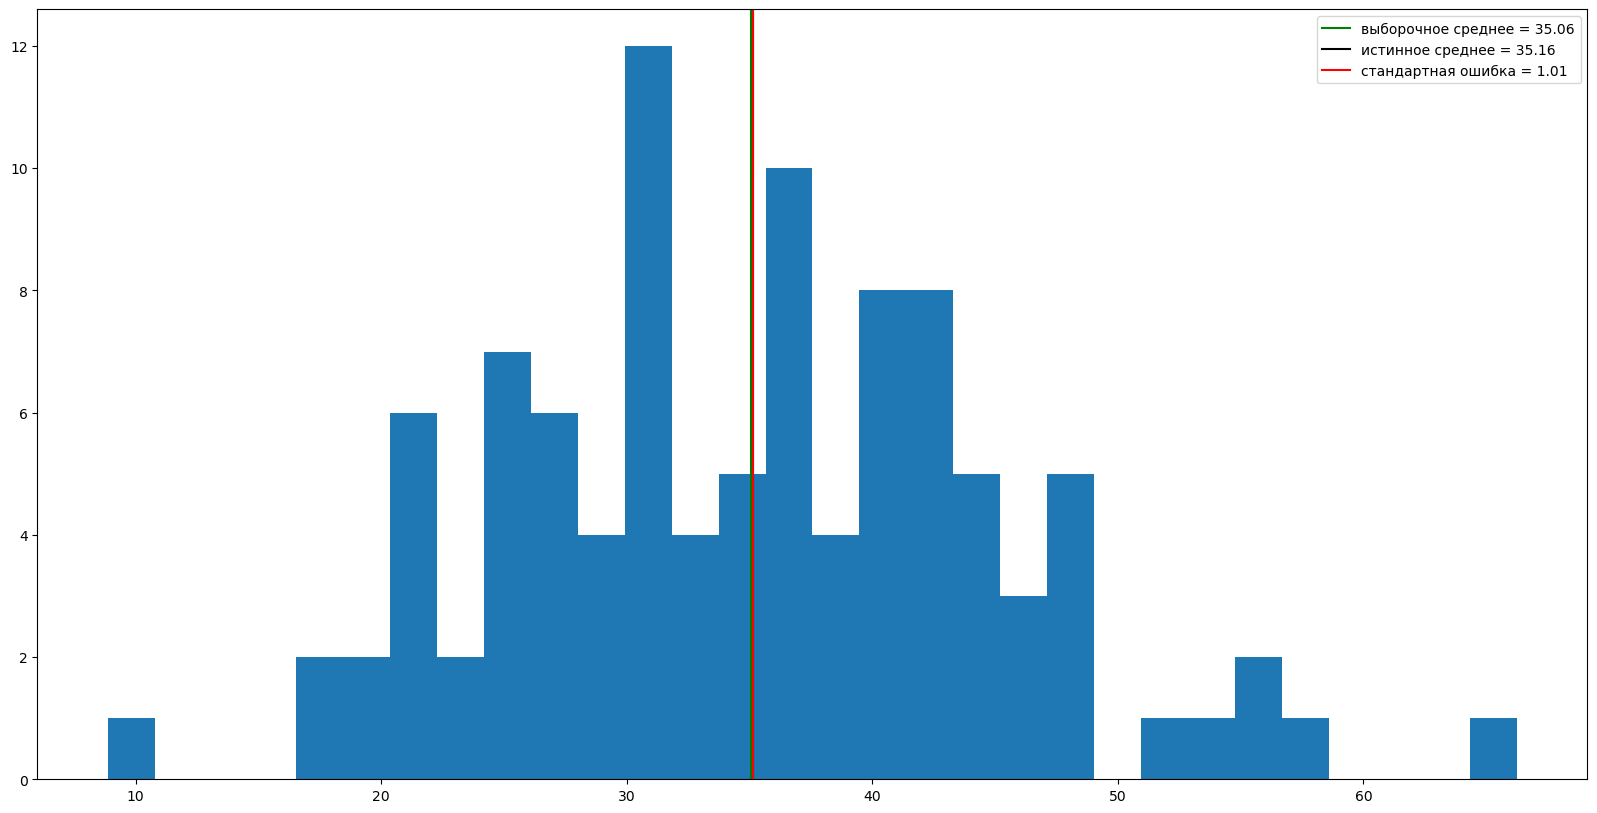

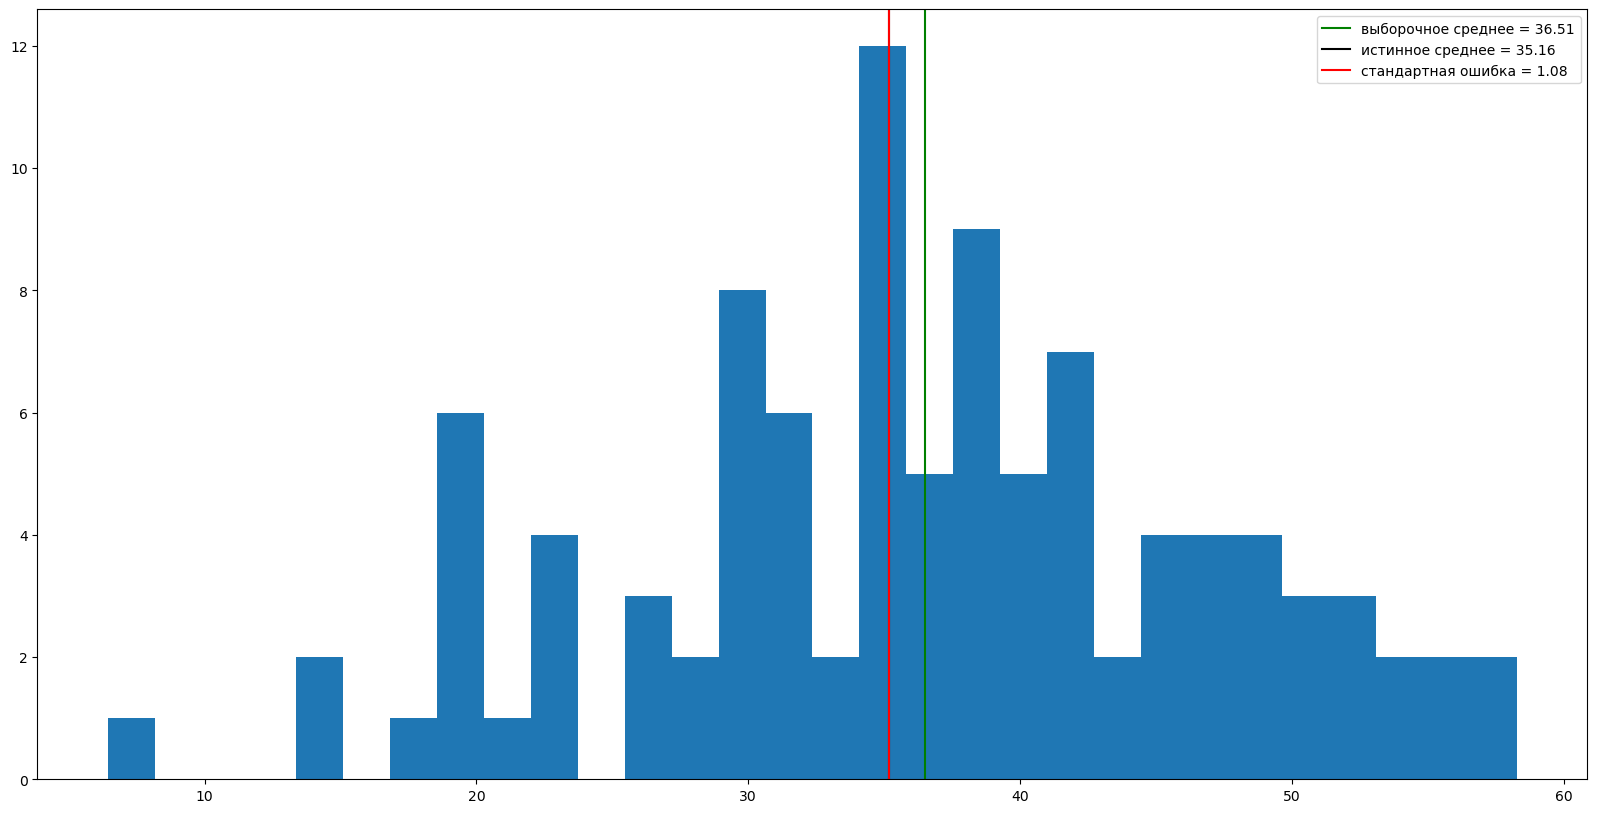

In [18]:
#посчитаем несколько раз для рандомных выборок стандартную ошибку
n = 100
for i in range(5):
    sample = np.random.choice(gen_pop, n, replace=False)
    sample_mean = np.mean(sample)
    sem = stats.sem(sample)
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(111)
    plt.hist(sample,30)
    line1 = plt.axvline(sample_mean, label=('выборочное среднее = ' + str(round(sample_mean,2))), color='green')
    line2 = plt.axvline(np.mean(gen_pop), label=('истинное среднее = ' + str(round(np.mean(gen_pop), 2))), color='black')
    line3 = plt.axvline(np.mean(gen_pop), label=('стандартная ошибка = ' + str(round(sem, 2))), color='red')
    ax1.legend(handles=[line1, line2, line3])
    plt.show()

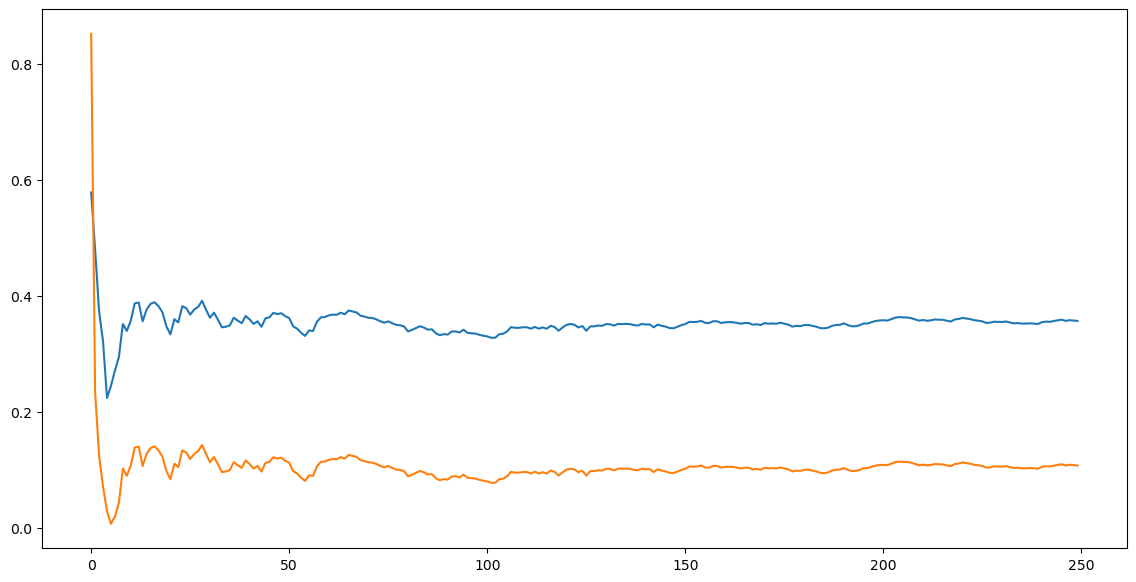

In [38]:
iterations = 5000
n = 20

std_sample_1 = []
std_sample_1_corrected = []

est = []
est_1 = []

for i in range(iterations):
    sample = np.random.choice(gen_pop, n, replace=False)
    std_sample = np.std(sample)
    std_sample_corrected = np.std(sample, ddof = 1)

    std_sample_1.append(std_sample)
    std_sample_1_corrected.append(std_sample_corrected)

    if i % 20 == 0:
        est.append(np.abs(np.mean(std_sample_1) - std_))
        est_1.append(np.abs(np.mean(std_sample_1_corrected) - std_))

fig = plt.figure(figsize=(14,7))
plt.plot(est)
plt.plot(est_1)
plt.show()
#с ростом числа наблюдений, оценка стандартного отклонения становится все точнее и точнее
#при этом наша смещенная оценка все больше и больше с точки зрения ошибки

In [42]:
est = []
#тут мы перебираем выборки с разными размерами и приходим к выводу что при большей выборке значение ближе - это СОСТОЯТЕЛЬНОСТЬ
for i in range(10,5000, 10):
    sample = np.mean(np.random.choice(gen_pop, i, replace=False))
    est.append(sample)

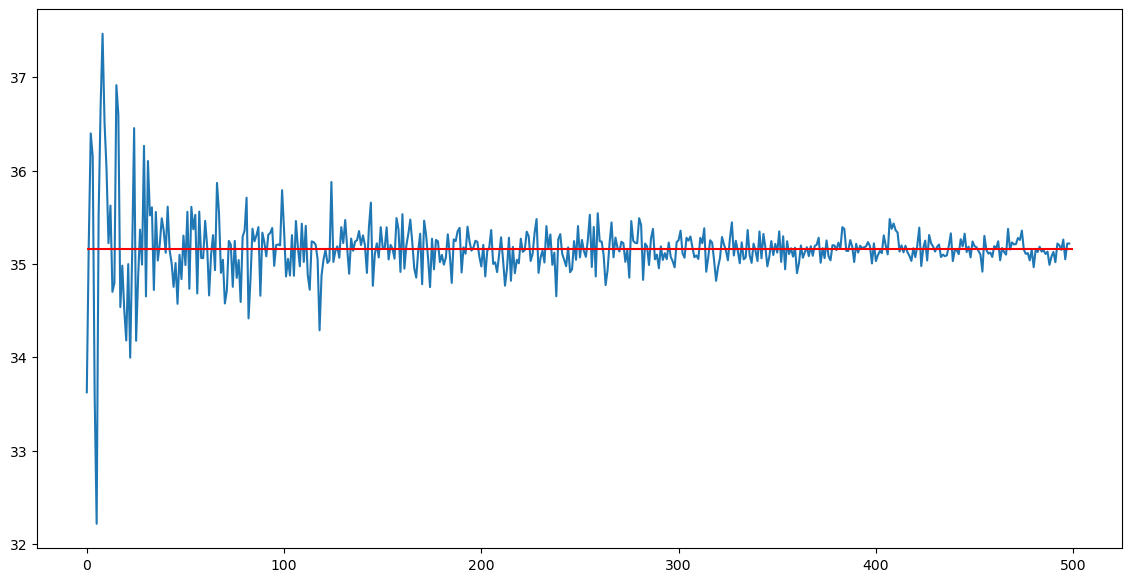

In [56]:
plt.figure(figsize=(14,7))
plt.plot(est)
plt.hlines(np.mean(gen_pop), 0 ,500, color='red')

In [58]:
#антипример (пример несостоятельной оценки)
est = []
for i in range(10,5000,10):
    sample = np.mean(np.random.choice(gen_pop, i, replace=False) * (np.sqrt(i)/i)) + 30
    est.append(sample)

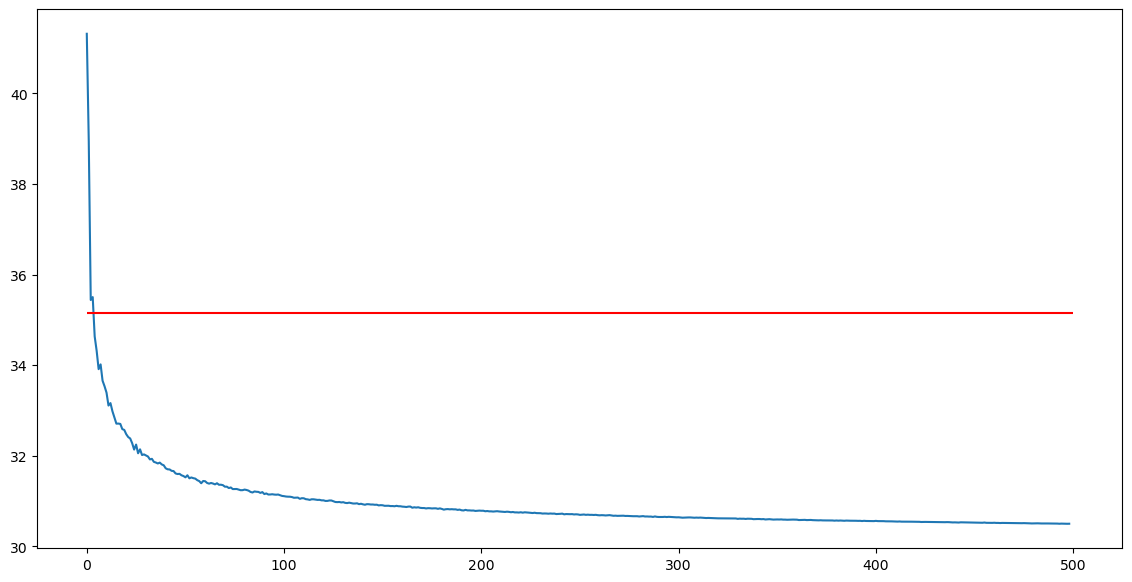

In [60]:
plt.figure(figsize=(14,7))
plt.plot(est)
plt.hlines(np.mean(gen_pop), 0 ,500, color='red')